In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('/content/lab - Sheet1.csv')

In [6]:
df.head

<bound method NDFrame.head of    region  tenure  age  income  marital  address  ed  employ  retire  gender  \
0       2      13   44      64        1        9   4       5       0       0   
1       3      11   33     136        1        7   5       5       0       0   
2       3      68   52     116        1       24   1      29       0       1   
3       2      33   33      33        0       12   2       0       0       1   
4       2      23   30      30        1        9   1       2       0       0   
5       2      41   39      78        0       17   2      16       0       1   
6       3      45   22      19        1        2   2       4       0       1   
7       2      38   35      76        0        5   2      10       0       0   
8       3      45   59     166        1        7   4      31       0       0   
9       1      68   41      72        1       21   1      22       0       0   

   reside custcat  
0       2       A  
1       6       D  
2       2       C  
3       1

In [7]:
df.shape

(10, 12)

In [8]:
df.isnull().sum()

region     0
tenure     0
age        0
income     0
marital    0
address    0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

In [9]:
df.columns

Index(['region', 'tenure', 'age', 'income', 'marital', 'address', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [10]:
dX=df.drop(['custcat'],axis=1)

In [11]:
df['custcat'].value_counts()

C    4
A    2
D    2
B    2
Name: custcat, dtype: int64

In [12]:
y= df['custcat']
y

0    A
1    D
2    C
3    A
4    C
5    C
6    B
7    D
8    C
9    B
Name: custcat, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


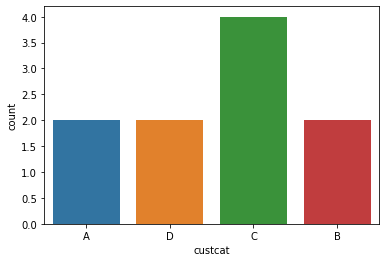

In [14]:
import seaborn
seaborn.countplot(df['custcat'])

In [16]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
test = SelectKBest(score_func= f_classif, k=5)
test.fit(dX,y)
pd.DataFrame(test.scores_)


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [8] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


,0
0,0.342857
1,1.781221
2,0.818692
3,1.015231
4,0.400000
5,0.499527
6,0.830769
7,1.226374
8,NaN
9,0.400000


In [17]:
X=df[['marital','gender','reside','tenure', 'age', 'address', 'income', 'ed','employ']]

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn = KNeighborsClassifier(n_neighbors=5)

In [20]:
knn.fit(X, y)

KNeighborsClassifier()

In [21]:
pred=knn.predict(X)
pred

array(['A', 'C', 'C', 'A', 'A', 'A', 'A', 'A', 'C', 'C'], dtype=object)

In [22]:
knn.predict(X).shape

(10,)

In [23]:
knn.score(X,y)

0.4

In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report

In [25]:
accuracy_score(y,pred)

0.4

In [26]:
confusion_matrix(y,pred)

array([[2, 0, 0, 0],
       [1, 0, 1, 0],
       [2, 0, 2, 0],
       [1, 0, 1, 0]])

In [27]:
print(classification_report(y,pred))

              precision    recall  f1-score   support

           A       0.33      1.00      0.50         2
           B       0.00      0.00      0.00         2
           C       0.50      0.50      0.50         4
           D       0.00      0.00      0.00         2

    accuracy                           0.40        10
   macro avg       0.21      0.38      0.25        10
weighted avg       0.27      0.40      0.30        10



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
